In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('raw/application_train.csv')

In [16]:
df = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [17]:
df

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
0,1,0.083037,0.262949,0.139376,-9461
1,0,0.311267,0.622246,NaN,-16765
2,0,NaN,0.555912,0.729567,-19046
3,0,NaN,0.650442,NaN,-19005
4,0,NaN,0.322738,NaN,-19932
...,...,...,...,...,...
307506,0,0.145570,0.681632,NaN,-9327
307507,0,NaN,0.115992,NaN,-20775
307508,0,0.744026,0.535722,0.218859,-14966
307509,1,NaN,0.514163,0.661024,-11961


In [18]:
df['DAYS_BIRTH'] = np.floor((-1 * df['DAYS_BIRTH']) / 365).astype(int)

In [19]:
df

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
0,1,0.083037,0.262949,0.139376,25
1,0,0.311267,0.622246,NaN,45
2,0,NaN,0.555912,0.729567,52
3,0,NaN,0.650442,NaN,52
4,0,NaN,0.322738,NaN,54
...,...,...,...,...,...
307506,0,0.145570,0.681632,NaN,25
307507,0,NaN,0.115992,NaN,56
307508,0,0.744026,0.535722,0.218859,41
307509,1,NaN,0.514163,0.661024,32


In [20]:
def analyze_missing_values(df):
    """
    데이터프레임의 각 컬럼별 결측치 비율을 계산하고 정렬하여 반환하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    
    Returns:
    pandas.DataFrame: 컬럼별 결측치 수와 비율
    """
    # 결측치 수와 비율 계산
    missing_stats = pd.DataFrame({
        '결측치 수': df.isnull().sum(),
        '전체 행 수': len(df),
        '결측치 비율(%)': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    # 결측치 비율 기준으로 내림차순 정렬
    missing_stats = missing_stats.sort_values('결측치 비율(%)', ascending=False)
    
    # 위험도 레벨 추가
    def get_risk_level(percent):
        if percent < 5:
            return '안전'
        elif percent < 15:
            return '주의'
        elif percent < 30:
            return '위험'
        else:
            return '매우 위험'
    
    missing_stats['위험도'] = missing_stats['결측치 비율(%)'].apply(get_risk_level)
    
    return missing_stats

In [21]:
missing = analyze_missing_values(df)

In [22]:
missing

,결측치 수,전체 행 수,결측치 비율(%),위험도
EXT_SOURCE_1,173378,307511,56.38,매우 위험
EXT_SOURCE_3,60965,307511,19.83,위험
EXT_SOURCE_2,660,307511,0.21,안전
TARGET,0,307511,0.00,안전
DAYS_BIRTH,0,307511,0.00,안전


In [23]:
df_drop = df.drop('EXT_SOURCE_1', axis=1)

In [24]:
df_dropna = df.dropna()

In [25]:
df_dropna

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
0,1,0.083037,0.262949,0.139376,25
6,0,0.774761,0.724000,0.492060,37
8,0,0.587334,0.205747,0.751724,55
10,0,0.319760,0.651862,0.363945,27
11,0,0.722044,0.555183,0.652897,55
...,...,...,...,...,...
307499,0,0.665343,0.649123,0.206779,46
307500,0,0.896042,0.789389,0.337673,55
307503,0,0.243466,0.501221,0.609276,32
307508,0,0.744026,0.535722,0.218859,41


In [28]:
print(df_dropna.isnull().sum())

TARGET          0
EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
DAYS_BIRTH      0
dtype: int64


In [31]:
def plot_correlation_matrix(df):
    """
    데이터프레임의 상관행렬을 히트맵으로 시각화하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    """
    # 상관행렬 계산
    corr_matrix = df.corr()
    
    # 그림 크기 설정 (데이터 크기에 따라 자동 조정)
    plt.figure(figsize=(20, 16))
    
    # 히트맵 그리기
    sns.heatmap(corr_matrix,
                annot=True,  # 상관계수 표시
                cmap='coolwarm',  # 색상 맵
                vmin=-1, vmax=1,  # 상관계수 범위
                center=0,  # 중앙값
                fmt='.2f',  # 소수점 둘째자리까지
                square=True,  # 정사각형 형태
                cbar_kws={'label': 'Correlation Coefficient'})
    
    # 제목 설정
    plt.title('Correlation Matrix', pad=20, size=15)
    
    # x축 레이블 회전
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 표시
    plt.show()

# 사용 예시:
# plot_correlation_matrix(df)

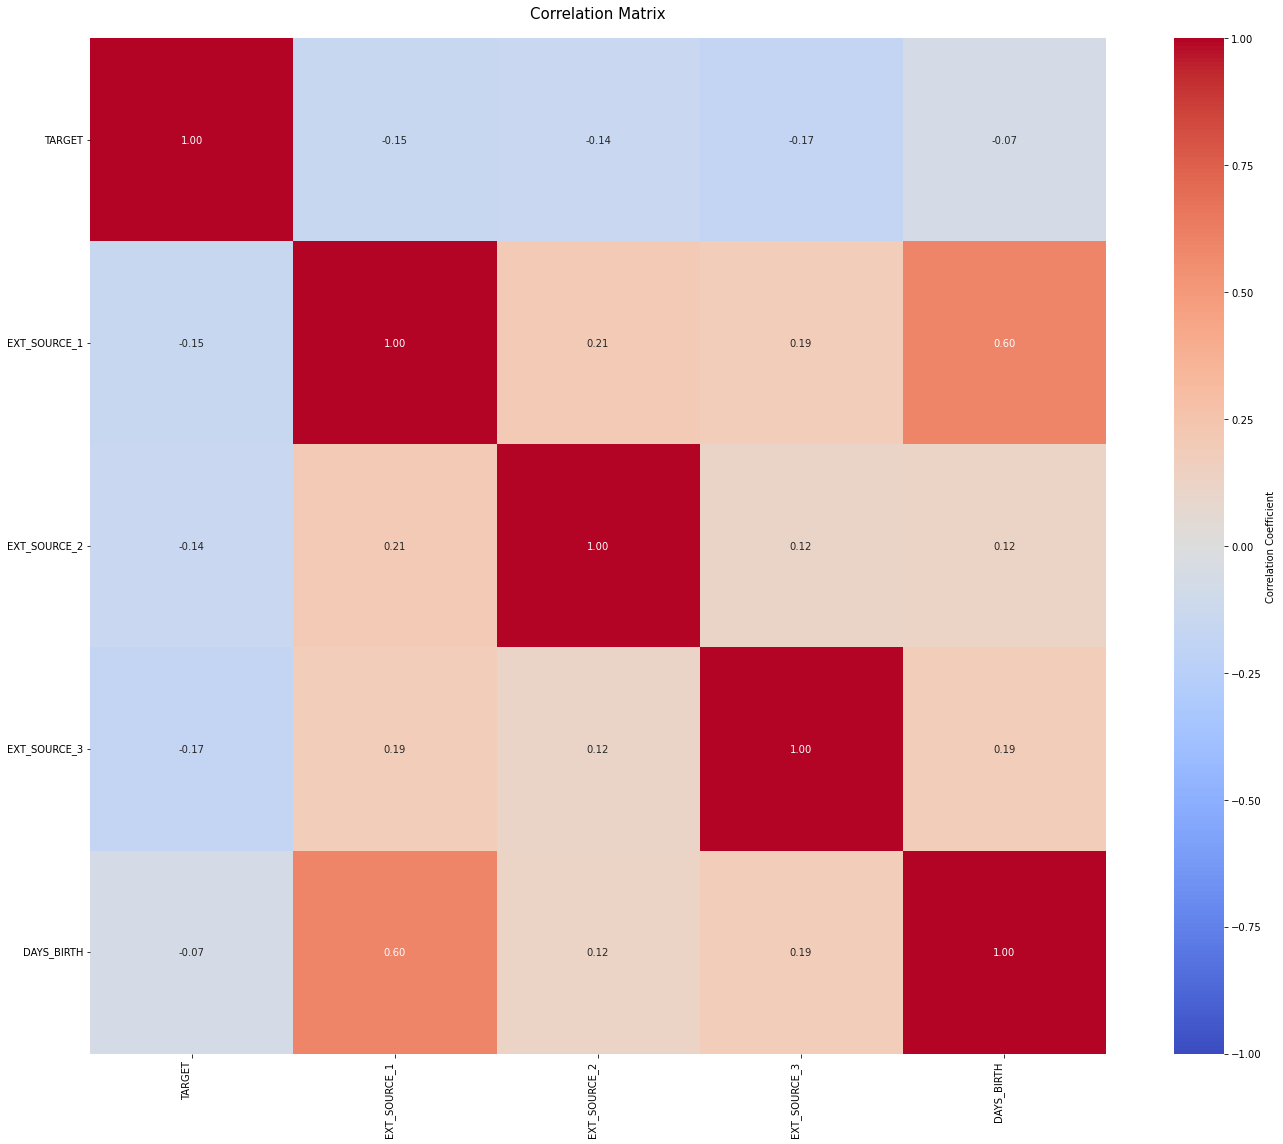

In [33]:
plot_correlation_matrix(df_dropna)

In [42]:
def plot_feature_distribution_by_target(df, feature_name, target_name='TARGET', figsize=(12, 6)):
    """
    Feature distribution visualization by target variable
    """
    import warnings
    warnings.filterwarnings('ignore')  # Suppress all warnings
    
    plt.figure(figsize=figsize)
    
    # Split data by TARGET
    target_0 = df[df[target_name] == 0][feature_name]
    target_1 = df[df[target_name] == 1][feature_name]
    
    # Plot distributions
    sns.kdeplot(data=target_0, color='blue', label='TARGET = 0', fill=True, alpha=0.3)
    sns.kdeplot(data=target_1, color='red', label='TARGET = 1', fill=True, alpha=0.3)
    
    # Styling
    plt.title(f'Distribution of {feature_name} by TARGET', size=15, pad=15)
    plt.xlabel(feature_name, size=12)
    plt.ylabel('Density', size=12)
    plt.legend(title='TARGET Value')
    
    # Statistics
    stats_text = f"""
    TARGET 0 Statistics:
    Count: {len(target_0):,}
    Mean: {target_0.mean():.2f}
    Median: {target_0.median():.2f}
    Std: {target_0.std():.2f}
    
    TARGET 1 Statistics:
    Count: {len(target_1):,}
    Mean: {target_1.mean():.2f}
    Median: {target_1.median():.2f}
    Std: {target_1.std():.2f}
    """
    
    plt.figtext(1.02, 0.5, stats_text, fontsize=10, va='center')
    
    plt.tight_layout()
    plt.show()

def plot_all_distributions(df, target_name='TARGET'):
    """
    Visualize distributions for all numeric features
    """
    import warnings
    warnings.filterwarnings('ignore')  # Suppress all warnings
    
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col != target_name]
    
    for feature in numeric_cols:
        plot_feature_distribution_by_target(df, feature)

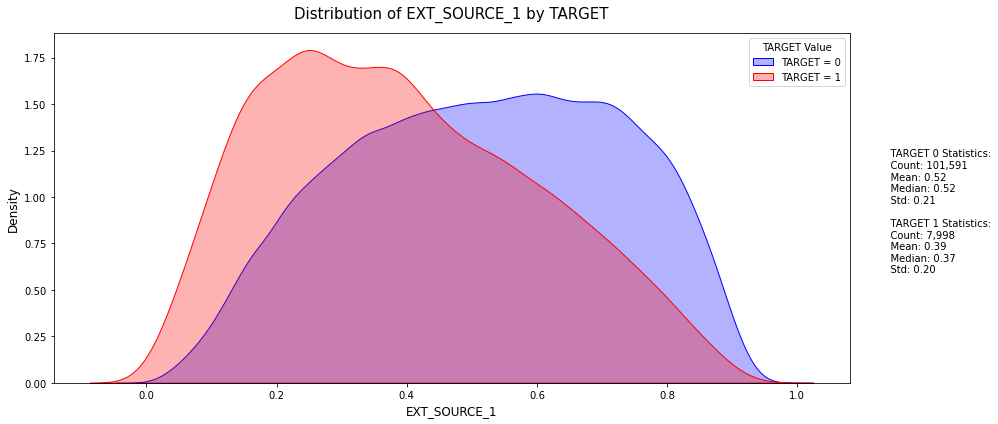

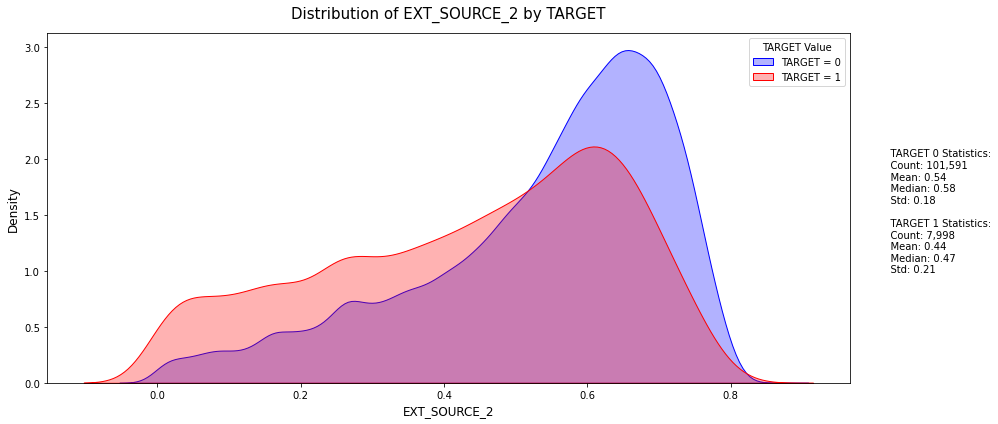

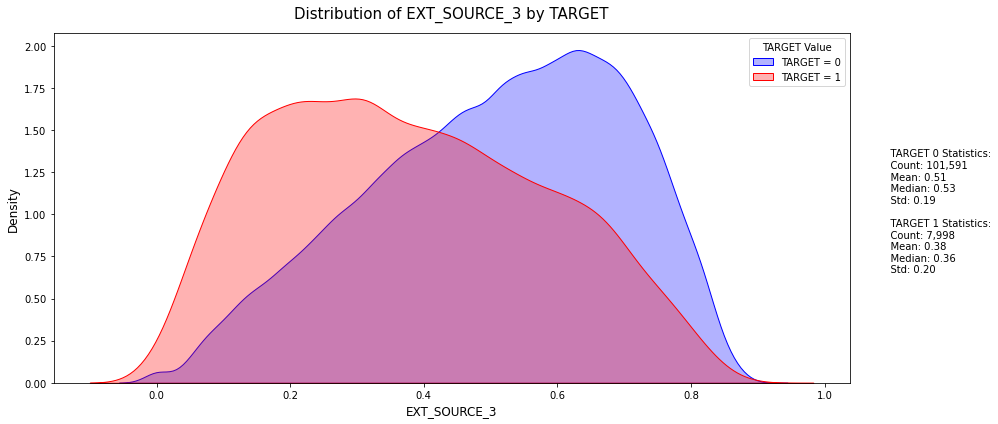

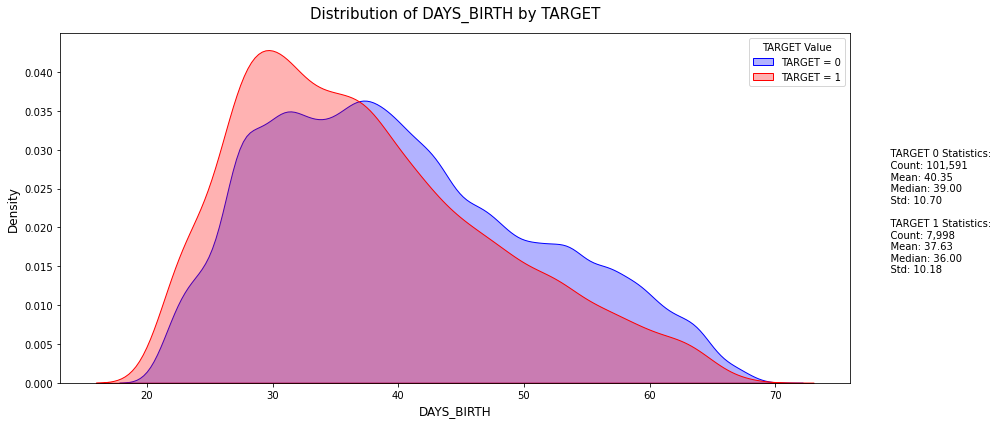

In [43]:
plot_all_distributions(df_dropna)